In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
work_dir = Path(r"D:\Work\2023\three_gorge")
sima_path = work_dir/"suyu_freedecay_data.csv"
cfd_path = work_dir/"RB_DATA.dat"

In [3]:
sima_data_df = pd.read_csv(sima_path)
sima_data_df.head()

,Time [s],heave [m],roll [deg],pitch [deg]
0,0.0,3.682258,4.979211,4.809143
1,0.1,3.679563,4.976808,4.807217
2,0.2,3.668353,4.969272,4.802440
3,0.3,3.648300,4.956541,4.794720
4,0.4,3.619188,4.938879,4.784087


In [4]:
cfd_data_df = pd.read_csv(cfd_path, sep="\s+")
cfd_data_df = cfd_data_df.iloc[0::3,:]
# Get rid of spaces in the columns
cfd_data_df.columns = cfd_data_df.columns.str.replace(" ", "")
cfd_data_df.columns

Index(['Time', 'CORx', 'CORy', 'CORz', 'COMx', 'COMy', 'COMz', 'Rxx', 'Rxy',
       'Rxz', 'Ryx', 'Ryy', 'Ryz', 'Rzx', 'Rzy', 'Rzz', 'vx', 'vy', 'vz', 'wx',
       'wy', 'wz'],
      dtype='object')

In [5]:
cfd_data_df["heave"] = cfd_data_df["COMz"] -cfd_data_df["COMz"].mean()

In [6]:
first_line = cfd_data_df.head(1)

In [7]:
first_line

,Time,CORx,CORy,CORz,COMx,COMy,COMz,Rxx,Rxy,Rxz,...,Rzx,Rzy,Rzz,vx,vy,vz,wx,wy,wz,heave
0,0.01,3.328985,0,-6.138928,3.328985,0,-6.138928,1,0,0,...,0,0,1,0,0,0.006938,0,0,0,-4.777839


In [8]:
local_minima = cfd_data_df['heave'][(cfd_data_df['heave'].shift(1) > cfd_data_df['heave']) & (cfd_data_df['heave'].shift(-1) > cfd_data_df['heave'])]
mask = cfd_data_df["heave"].isin(local_minima)
cfd_local_minima_df = cfd_data_df[mask]
cfd_local_minima_df = first_line.append(cfd_local_minima_df).loc[:,["Time","heave"]]
cfd_local_minima_df

C:\Users\33937\AppData\Local\Temp\ipykernel_56160\3866346189.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cfd_local_minima_df = first_line.append(cfd_local_minima_df).loc[:,["Time","heave"]]


,Time,heave
0,0.01,-4.777839
5808,19.37,-1.144527
11082,36.95,-0.399121
16731,55.78,-0.634672
22347,74.50,-0.435156
27897,93.00,-0.209711
32703,109.02,-0.487454
39207,130.70,-0.504126
43884,146.29,-0.327036
49611,165.38,-0.568510


In [9]:
cfd_local_minima_df = cfd_local_minima_df.reset_index(drop=True).reset_index()
cfd_local_minima_df 

,index,Time,heave
0,0,0.01,-4.777839
1,1,19.37,-1.144527
2,2,36.95,-0.399121
3,3,55.78,-0.634672
4,4,74.50,-0.435156
5,5,93.00,-0.209711
6,6,109.02,-0.487454
7,7,130.70,-0.504126
8,8,146.29,-0.327036
9,9,165.38,-0.568510


In [10]:
cfd_local_minima_df["Period"] = cfd_local_minima_df["Time"].diff()
cfd_local_minima_df["Amplitude"] = -cfd_local_minima_df["heave"]

In [11]:
cfd_local_minima_df

,index,Time,heave,Period,Amplitude
0,0,0.01,-4.777839,NaN,4.777839
1,1,19.37,-1.144527,19.36,1.144527
2,2,36.95,-0.399121,17.58,0.399121
3,3,55.78,-0.634672,18.83,0.634672
4,4,74.50,-0.435156,18.72,0.435156
5,5,93.00,-0.209711,18.50,0.209711
6,6,109.02,-0.487454,16.02,0.487454
7,7,130.70,-0.504126,21.68,0.504126
8,8,146.29,-0.327036,15.59,0.327036
9,9,165.38,-0.568510,19.09,0.568510


In [12]:
cfd_local_minima_df["Damping"] = (np.log(cfd_local_minima_df.at[0,"Amplitude"])-np.log(cfd_local_minima_df["Amplitude"]))/cfd_local_minima_df["index"]/2/np.pi

In [13]:
cfd_local_minima_df

,index,Time,heave,Period,Amplitude,Damping
0,0,0.01,-4.777839,NaN,4.777839,NaN
1,1,19.37,-1.144527,19.36,1.144527,0.227432
2,2,36.95,-0.399121,17.58,0.399121,0.197549
3,3,55.78,-0.634672,18.83,0.634672,0.107092
4,4,74.50,-0.435156,18.72,0.435156,0.095335
5,5,93.00,-0.209711,18.50,0.209711,0.099504
6,6,109.02,-0.487454,16.02,0.487454,0.060546
7,7,130.70,-0.504126,21.68,0.504126,0.051132
8,8,146.29,-0.327036,15.59,0.327036,0.053350
9,9,165.38,-0.568510,19.09,0.568510,0.037644


In [14]:
print(cfd_local_minima_df["Period"].mean())

18.990000000000002


In [15]:
cfd_data_df.to_csv(work_dir/"heave"/"cfd_heave.csv")

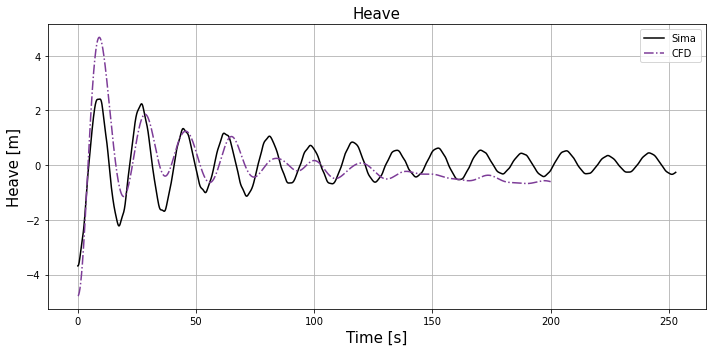

In [16]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(sima_data_df["Time [s]"],-sima_data_df["heave [m]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(cfd_data_df['Time'], cfd_data_df['heave'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Heave [m]", fontsize=15)
ax.set_title("Heave", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"heave_finemesh.jpg", bbox_inches="tight", dpi=400)

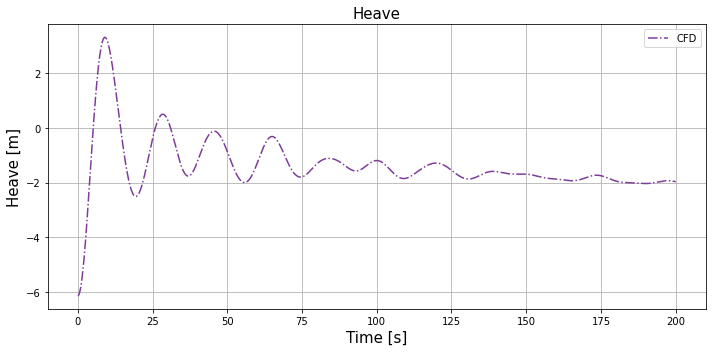

In [17]:
fig,ax = plt.subplots(figsize=(10,5))
# ax.plot(sima_data_df["Time [s]"],-sima_data_df["heave [m]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(cfd_data_df['Time'], cfd_data_df['COMz'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Heave [m]", fontsize=15)
ax.set_title("Heave", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"heave.jpg", bbox_inches="tight", dpi=400)

In [18]:
def get_euler_angles(df):
    orientation = df[['Rxx', 'Rxy','Rxz', 'Ryx', 'Ryy', 'Ryz', 'Rzx', 'Rzy', 'Rzz']].values
    R = np.reshape(orientation, (3, 3))
    roll = np.arctan2(R[2, 1], R[2, 2])
    pitch = np.arctan2(-R[2, 0], np.sqrt(R[2, 1]**2 + R[2, 2]**2))
    yaw = np.arctan2(R[1, 0], R[0, 0])
    roll_degrees = np.degrees(roll)
    pitch_degrees = np.degrees(pitch)
    yaw_degrees = np.degrees(yaw)
    return roll_degrees, pitch_degrees, yaw_degrees

In [19]:
cfd_data_df[['Roll', 'Pitch', 'Yaw']] = cfd_data_df.apply(get_euler_angles, axis=1, result_type='expand')

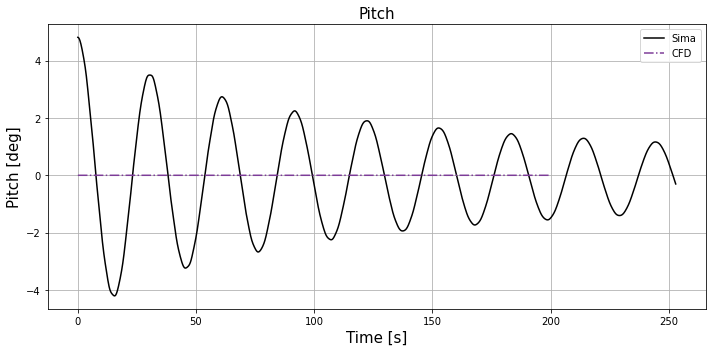

In [20]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(sima_data_df["Time [s]"],sima_data_df["pitch [deg]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(cfd_data_df['Time'], cfd_data_df['Pitch'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Pitch [deg]", fontsize=15)
ax.set_title("Pitch", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"pitch_coarse_mesh.jpg", bbox_inches="tight", dpi=400)

In [21]:
cfd_data_df

,Time,CORx,CORy,CORz,COMx,COMy,COMz,Rxx,Rxy,Rxz,...,vx,vy,vz,wx,wy,wz,heave,Roll,Pitch,Yaw
0,0.01,3.328985,0,-6.138928,3.328985,0,-6.138928,1,0,0,...,0,0,0.006938,0,0,0,-4.777839,0.0,-0.0,0.0
3,0.02,3.328985,0,-6.138819,3.328985,0,-6.138819,1,0,0,...,0,0,0.017212,0,0,0,-4.777730,0.0,-0.0,0.0
6,0.03,3.328985,0,-6.138649,3.328985,0,-6.138649,1,0,0,...,0,0,0.021390,0,0,0,-4.777560,0.0,-0.0,0.0
9,0.04,3.328985,0,-6.138409,3.328985,0,-6.138409,1,0,0,...,0,0,0.027055,0,0,0,-4.777320,0.0,-0.0,0.0
12,0.05,3.328985,0,-6.138092,3.328985,0,-6.138092,1,0,0,...,0,0,0.034980,0,0,0,-4.777003,0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59985,199.96,3.328985,0,-1.962320,3.328985,0,-1.962320,1,0,0,...,0,0,-0.023823,0,0,0,-0.601231,0.0,-0.0,0.0
59988,199.97,3.328985,0,-1.962559,3.328985,0,-1.962559,1,0,0,...,0,0,-0.023872,0,0,0,-0.601469,0.0,-0.0,0.0
59991,199.98,3.328985,0,-1.962798,3.328985,0,-1.962798,1,0,0,...,0,0,-0.023921,0,0,0,-0.601708,0.0,-0.0,0.0
59994,199.99,3.328985,0,-1.963037,3.328985,0,-1.963037,1,0,0,...,0,0,-0.023969,0,0,0,-0.601948,0.0,-0.0,0.0


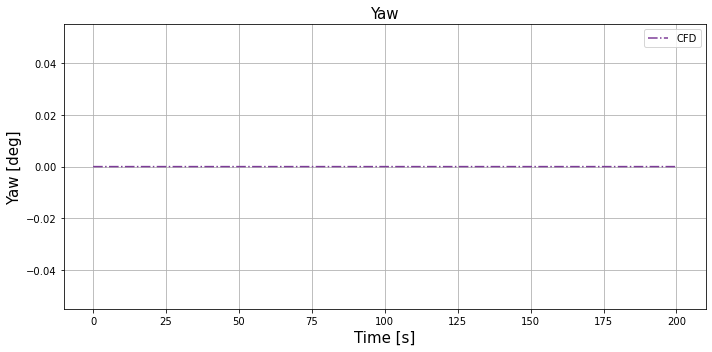

In [22]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(cfd_data_df['Time'], cfd_data_df['Yaw'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Yaw [deg]", fontsize=15)
ax.set_title("Yaw", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"Yaw.jpg", bbox_inches="tight", dpi=400)